# Golden wind in r/WallStreetBets

* r/WallStreetBets Research Project Phase 3
* Team 4
* Anqi Fang, Jiashuo Sun, Raymond Su

Part 1. Introduction of research and problem

Part 2. Data description and preperation (see seperate notebook )

Part 3 (Analysis). Identification and Analysis on Key Opinion Leader (KOL)

Part 4 (Analysis). High Frequency Words and Named Entity Recognition

Part 5 (Analysis). Topic Modeling Analysis (see seperate notebook "Team4_FinalReport_Topic_modeling.ipynb")

Part 6 (Analysis). Characteristics of popular submissions (see seperate notebook "Team4_FinalReport_Prediction.ipynb")

Part 7 (Analysis). Predict what kind of submission will get popular on subreddit r/WallStreetBets? (see seperate notebook "Team4_FinalReport_Prediction.ipynb")

Part 8: Limitation, Future Work, and Ethical Consideration
Part 9: Work Allocation


## Part 1. Introduction of research and problem


### Part 1-1: Problem/Topic of this project
The focus of our study would be the "GameStop" event which happened on this r/WallStreetBets subreddit in 2021. The event is very dramatic and triggered huge reactions from various fields, especially the finance and investment area. Some reddit users identified an opportunity to short queeze the Wall Street investment funds which short sold the stocks of a small company GameStop, and appealed the users on this subreddit to buy the stock and hold. As a result, the price of this stock was pushed rocket high at the beginning of 2021.

The narritive of retail investors "battling" Wall Street is very attractive, and could inspire discussion about whether this is the victory of finanical democratization, or this is the proof that retail investors can sometimes lead to disruption of "normal order" of financial market. We are also very interested in this event and the online community r/WallStreetBets, so we want to conduct some research on user interactions and patterns in this cummunity, as well as signals or prophecy of similar wide-spread event, from the perspective of social media itself, instead of the financial market.



### Part 1-2: Research Questions
* First of all, are there any Key Opinion Leaders? How to measure their influence? We are going to find some metrics to measure the influence, like upvote ratio, score, comments ...etc
* Secondly, how were users convinced and motivated? We are going to investigate the interactions of users in this subreddit by analyzing the votes and comments.
* Next, what are the signals for such widespread herd behaviors? We are planning to study the keyword, number of posts related to this "GameStop" discussion, rising posts …etc to find out the significant signals.
* Lastly, can we predict the next "GameStop" event? If possible and if time permits, we want to investigate whether it is possible to develop a method to identify the pattern or signal of similar events happening and send out the alerts to stakeholders.

### Part 1-3: Motivation

* We want to help investors to recognize the signal and identify the trend early and react quickly.
* We also hope the results of our study can set an alert to the financial regulators like SEC to react to some unexptected trend like the "GameStop" event quickly.
* We want to provide more insights to researchers about the online community ecosystem, to shed some light on and possibly inspire more research study on online community. 

## Part 2. Data description and preperation 

### Part 2-1: Data preperation

**Please see Team4_FinalReport_fetch_and_clean.ipynb**

### Part 2-2: Data description
In order to fetch a large amount of data from r/wallstritbets, we decide to use PushshiftAPI from the psaw library. To be more specific about the attribute of each submission, we are going to parse the following fields: 'author,' 'id,' 'num_comments,' 'score,' 'upvote_ratio,' 'title,' 'created_utc,' and 'selftext.'

* author: Provides an instance of Redditor.
* id: ID of the submission.
* num_comments: The number of comments on the submission.
* score: The number of upvotes for the submission.
* upvote_ratio: The percentage of upvotes from all votes on the submission.
* title: The title of the submission.
* selftext: The article of the post.
* created_utc: Time the submission was created, represented in Unix Time.

In addition, because the study focuses on the GameStop event, we limited our research period from 2020-12-08 to 2021-03-01 to ensure that all data are consistent with the real world.

Lastly, we store all the submission data into a DataFrame and save is as csv file for future use.

## Part 3. Identification and Analysis on Key Opinion Leader (KOL) 

#### Introduction to our overall analysis methodology

We will analyze through two perspectives, user and post. Part 3 and 4 in this notebook focus on the user while part 5 and 6 in a seperate notebook emphsazies the analysis through the post content.
1. User perspective
* We will go through simple correlation analysis as first step. The next step is identifying the KOL. We will also narrow down our focus on the "Title" and "Text" of the KOL, as well as more on the frequent terms and name.
2. Post perspective
* We will define the "popular" posts by upvote ratio and score (number of upvotes), and then analyze the characteristics of popular posts/submissions. Furthermore, we will try to predict what kind of submissions will get popular, as the first step of trying to capture signals for the next "GameStop" event.





#### *What is KOL?*
Key Opinion Leader (KOL) is a well-respected or trusted influencer with proven experience and expertise in a particular field. In our cases, we define KOL as those who attracted attention and interaction from other in the  r/WallStreetBets discussion board. We measure attention and interaction mainly through three numeric variable from our data, which are: "num_comments", "score", and "upvote_ratio".

#### *Why analyzing KOL?*
Understanding KOL's behaviors and differences will help us understand the informations and actions that trigger and impact other user at the internet envirnment. The study of KOL can also be used as the tool to guide the online user to maintain an efficient and attractive, yet respectful disucssion environment.

#### *Goals of analyzing KOL*
We want to find out how did users with the most eye-catching and popular posts behave at r/WallStreetBets. What are the things that they do differently from the average users in the discussion. Also, did they raise the attention through positive or negative behaviors. 

### KOL Analysis Step 1. Analysis the correlations between "num_comments", "score", and "upvote_ratio"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("./drive/MyDrive/cleaned_submissions.csv")

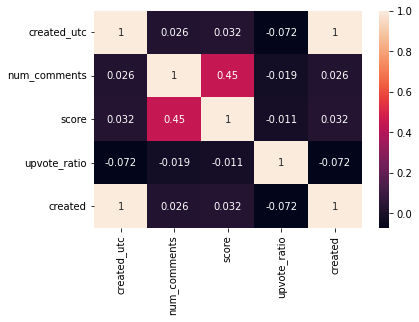

In [ ]:
#Inspect the relationships among numeric variables
corrMatrix = df.corr()
#Visualize the correlations among numeric variables
#Referencing: https://datatofish.com/correlation-matrix-pandas/
sn.heatmap(corrMatrix, annot=True)
plt.show()

The correlations between the three main numeric variables that we want to analysis are:
* num_comments vs. score = 0.45
* num_comments vs. upvote_ratio = -0.019
* score vs. upvote_ratio = -0.011
We learned that "upvote_ratio" is not strongly correlated with both "num_comments" and "score". Thus, we can exclude it for now in our analysis. We do see that "num_comments" and "score" are positively correlated with a score of 0.45. Next, we will focus on digging into "num_comments" and "score".

In [ ]:
#Top 100 user with the highest "num_comments"
top_100_num_comments = df.sort_values(by='num_comments', ascending=False).head(100)

In [ ]:
#Top 100 user with the highest up vote "score"
top_100_score = df.sort_values(by='score', ascending=False).head(100)

In [ ]:
#Detect whether two lists is having any intersection
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [ ]:
#Find out if there is any intersection of "ID" from the top 100 "num_comments" and "score"
comments_author = top_100_num_comments['author'].tolist()
score_author = top_100_score['author'].tolist()
kol = intersection(comments_author, score_author)
Counter(kol)

Counter({'-ordinary': 1,
         'AquaSea_Squirrel': 1,
         'AutoDrafter2020': 1,
         'JoeWelburg': 1,
         'Lancaster61': 1,
         'MarioBuzo': 1,
         'Peteskies': 1,
         'RVCFever': 1,
         'Rambo2307': 1,
         'RebelliousBreadbox': 1,
         'SenateMajorityLeader': 1,
         'Slyver12': 1,
         'Tay_Tay86': 1,
         'Treeline1': 1,
         'Tyrion69Lannister': 1,
         'Wonderboi1995': 1,
         '__TIE_Guy': 1,
         'astroxlogical': 1,
         'bmo1234': 1,
         'convolutionx': 1,
         'enter--matrix': 1,
         'geomanis': 1,
         'hallidev': 1,
         'hamzah604': 1,
         'handypanda93': 1,
         'helmu': 1,
         'jfkah': 1,
         'kigfik': 1,
         'klayb': 1,
         'kokoloko1010': 1,
         'licensed_overthinker': 1,
         'misterYOLOdolo': 1,
         'mooboy333': 1,
         'natenicholson': 1,
         'nogoodnamesework': 1,
         'pmurphy0922': 1,
         'protege45': 1,
  

In order to learn about whether there is any significant similarities between users with many "num_comments" and users with many "score", we checked the intersection of the result from filtering solely with "num_comments" and "score". Interestingly, we found many overlap at all on the top 100 users with most "num_comments" and the top 100 users with most "score". We also used the counter function to categorize the overlap and found that none of the overlap repreated. 

We can have the initial conclusion that the most praised posts do not equal to the most commented post. Yet, there is many overlap, thus is accurate to say the combination of top "num_comments" and "score" can be used for defineing KOL.

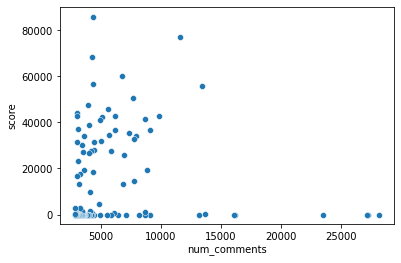

In [ ]:
#Scatter plot of "num_comments" and "score" to confirm whether they have any correlation
sns.scatterplot(x="num_comments", y="score", data=top_100_num_comments)

* The scatter plot result proven that there is a slight positive correlation between "num_comments" and "score". Since the correlation is not that strong, we are stopping the analysis of relationship between these two variable for now. 
* We will continue the analysis taking both "num_comments" and "score" into consideration and filter them together to find posts that have both high "num_comments" and "score". As for now we define KOL as the top 20 users with most "num_comments" and "score". 
* There are can be many concerns about the defination of KOL, eg. user who posted ealier might have more chance for getting higher "num_comments". However, since are only analyzing the specifc period during the GameStop event, we are not very concern with the impact of time. 

In [ ]:
#Top 20 user with the highest "num_comments" and "score"
top_20_score_num_comments = df.sort_values(
    by=['score', 'num_comments'], ascending=False).head(20)

### KOL Analysis Step 2. Analysis the "title" of the top 20 user with the highest "num_comments" and "score"

Learning from the research paper *<This Just In: Fake News Packs a Lot in Title, Uses Simpler, Repetitive Content in Text Body, More Similar to Satire than Real News>* written by Benjamin D. Horne and Sibel Adali, the "Title" of posts and news is a very informatic indication that tells whether the source/information below the "Title" is trust-worthy. One of the indications from "Title" is the use of capital letter. Horne and Adali wrote that "Fake titles also used more all capitalized words, significantly more proper nouns, but fewer nouns overall, and fewer stopwords", We want to investigate KOL's creditibility from the title of their post through the ratio of capital letter they used. 

In [ ]:
#Tokenize the "title"
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer

#Iterate through the “title" text to seperate the text
whiteSpace_tokens = []
for text in top_20_score_num_comments['title']:
    whiteSpace_tokens.append(WhitespaceTokenizer().tokenize(text))

#Count the capital lette used in "title" and compute the ratio of capital letter
lower_cases_cnt = []
upper_cases_cut = []
for text in top_20_score_num_comments['title']:
    count_lower=0
    count_upper=0
    for i in text:
          if(i.islower()):
                count_lower=count_lower+1
          elif(i.isupper()):
                count_upper=count_upper+1
    lower_cases_cnt.append(count_lower)
    upper_cases_cut.append(count_upper)

top_20_score_num_comments['title_lower_cases_cnt'] = lower_cases_cnt
top_20_score_num_comments['title_upper_cases_cut'] = upper_cases_cut
top_20_score_num_comments['title_letter_cut'] = 
      top_20_score_num_comments['title_lower_cases_cnt'] + top_20_score_num_comments['title_upper_cases_cut'] 
top_20_score_num_comments['title_upper_ratio'] = 
      top_20_score_num_comments['title_upper_cases_cut'] / top_20_score_num_comments['title_letter_cut'] 

In order to make comparision of the capital letter ratio we generated for the top 20 user's post with most comment and up-vote score. We also generated a 1000 rows of data as a sample of the entire data, and then did the same analysis. 

In [ ]:
#Randomly generated 1000 rows as sample data for comparison
df_sample = df.sample(n=1000)

#Iterate through the “title" text to seperate the text
whiteSpace_tokens = []
for text in df_sample['title']:
    whiteSpace_tokens.append(WhitespaceTokenizer().tokenize(text))

#Count the capital lette used in "title" and compute the ratio of capital letter
lower_cases_cnt = []
upper_cases_cut = []
for text in df_sample['title']:
    count_lower=0
    count_upper=0
    for i in text:
          if(i.islower()):
                count_lower=count_lower+1
          elif(i.isupper()):
                count_upper=count_upper+1
    lower_cases_cnt.append(count_lower)
    upper_cases_cut.append(count_upper)

df_sample['title_lower_cases_cnt'] = lower_cases_cnt
df_sample['title_upper_cases_cut'] = upper_cases_cut
df_sample['title_letter_cut'] = df_sample['title_lower_cases_cnt'] + df_sample['title_upper_cases_cut'] 
df_sample['title_upper_ratio'] = df_sample['title_upper_cases_cut'] / df_sample['title_letter_cut'] 

In [ ]:
#Compute the mean of capital letter ratio in top 20 data and the sample data
mean1 = df_sample['title_upper_ratio'].mean()
mean2 = top_20_score_num_comments['title_upper_ratio'].mean()

#Print out result for comparison
print("Average upper cases letter ratio in title of sample: " + str(mean1))
print("Average upper cases letter ratio in title of top 20 account with up-vote score and comments: " + str(mean2))


Average upper cases letter ratio in title of sample: 0.3499281113184498
Average upper cases letter ratio in title of top 20 account with up-vote score and comments: 0.1515672892339675


Interestingly, we see that the upper case ratio in title is much higher in the sample data than the top 20 data. The sample data is almost three times to the top 20 data. This is saying that the title of KOL's posts are more conservative with less capital letter, they attract people's attention with the actual content not the dramatic wording and misleading hits in their title. 



### KOL Analysis Step 3. Analysis of KOL's text content
We will be using VADER Sentiment Analysis to analyze the text content from the KOL leader. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

We will use the average compound value of the entire dataset as the "sentiment score". The compound value is generated through the function inside the VADER package.It is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 

In [ ]:
!pip install vaderSentiment

In [ ]:
#loop through top 20 data with VADER Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_df = pd.DataFrame()
for text in tqdm(top_20_score_num_comments['tokened_text']):
    for i in text:
        analyzer = SentimentIntensityAnalyzer()
        a = analyzer.polarity_scores(i)
        temp = pd.DataFrame.from_dict(a, orient ='index') 
        temp = temp.transpose()
        vader_df = pd.concat([vader_df, temp], axis=0)

print('Average "neg" value: '+ str(vader_df['neg'].mean()))
print('Average "neu" value: '+ str(vader_df['neu'].mean()))
print('Average "pos" value: '+ str(vader_df['pos'].mean()))
print('Average "compound" value: '+ str(vader_df['compound'].mean()))

100%|██████████| 20/20 [06:12<00:00, 18.62s/it]

Average "neg" value: 0.0
Average "neu" value: 0.863777583047877
Average "pos" value: 0.03600732892535649
Average "compound" value: 0.016520162510953444


The average "compound" value of the top 20 data is 0.0165, which is mostly netural in polarity. This is saying the text content are neither positive nor negative. We will next use the sample data generated above to do the exact same VADER Sentiment Analysis, and us the result as comparison again.

In [ ]:
#loop through sample data with VADER Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_df = pd.DataFrame()
for text in tqdm(df_sample['tokened_text']):
    for i in text:
        analyzer = SentimentIntensityAnalyzer()
        a = analyzer.polarity_scores(i)
        temp = pd.DataFrame.from_dict(a, orient ='index') 
        temp = temp.transpose()
        vader_df = pd.concat([vader_df, temp], axis=0)

print('Average "neg" value: '+ str(vader_df['neg'].mean()))
print('Average "neu" value: '+ str(vader_df['neu'].mean()))
print('Average "pos" value: '+ str(vader_df['pos'].mean()))
print('Average "compound" value: '+ str(vader_df['compound'].mean()))

100%|██████████| 1000/1000 [2:12:39<00:00,  7.96s/it]

Average "neg" value: 0.0
Average "neu" value: 0.867971729542138
Average "pos" value: 0.032540049134023065
Average "compound" value: 0.014929374542694027


The average "compound" score of the sample data is 0.0149 which is also in the range of netrual. The results of both top 20 data and the sample data are very similar.

### KOL Analysis Step 4. Initial findings and conclusions of KOL

* We learned from the correlation analysis that the indication of KOL is the combination of number of comment and up-vote score.
* We learned that most commented KOL does not mean it is the most up-voted KOL, same to the opposite way. Yet the combination of them is KOL.
* KOL write their post with title that has less captial letter, in another way showing that they did not attract online user's attention through its actual content. This result also tells that users on r/WallStreetBets has the ability to distinguish fake or unauthentic information.
* Lastly, there is no significant different on sentiment of the content from KOL.


## Part 4. High frequency word and Name Entity Recognition

In this section, we will identify the high frequency word and name entity.

Continuing from the data processed in the previous steps, we will further analyze whether the data has similar phrases to gain a better understanding about what kind of words may appear in these kind of events.

Named entity recognition is one of the text analysis process that can identify and classify named entities. The following are the most common fields of named entitie:

1. Organizations
2. Places
3. Money
4. Date
5. Person

In order to identify named entity we will use the Spacy library to help recognize the name entity.

### High Frequency word

In [ ]:
def top20(thislist):
    # First make a string out of the entire list
    joinstr = " ".join([str(text) for text in thislist])
    wordlist = joinstr.split(" ")
    wordcount = Counter(wordlist)
    return(wordcount.most_common(20))

<BarContainer object of 20 artists>

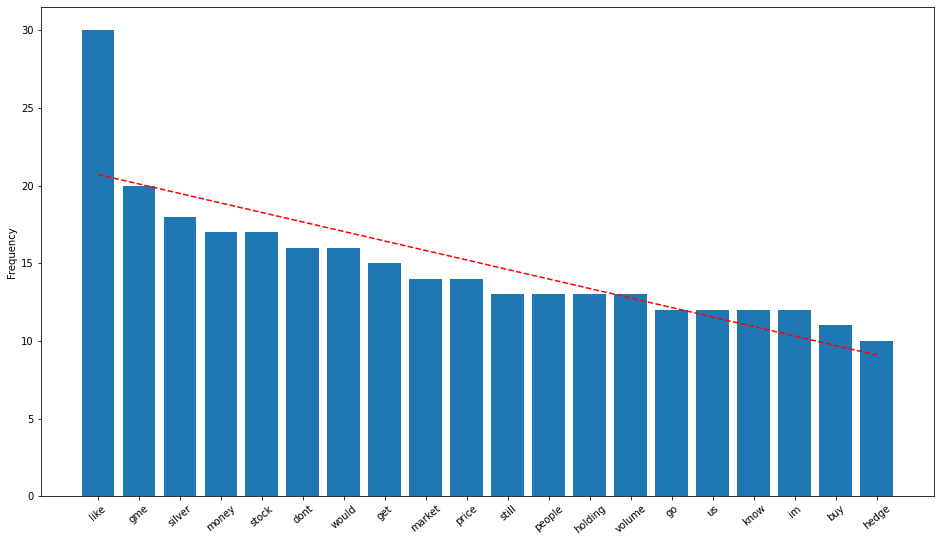

In [ ]:
# turn cleaned_text into list
high_f = top20(top_20_score_num_comments.cleaned_text.tolist())

# sort by frequency
high_f.sort(key=lambda x: x[1], reverse=True) 

word = list(zip(*high_f))[0]
freq = list(zip(*high_f))[1]
x_pos = np.arange(len(word))

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, freq, 1)
trendline = intercept + (slope * x_pos)

plt.figure(figsize = (16,9))
plt.plot(x_pos, trendline, color='red', linestyle='--') 
plt.xticks(x_pos, word)
plt.xticks(rotation = 40)
plt.ylabel('Frequency')
plt.bar(x_pos, freq, align = 'center')

Based on the above bar plot sorted by the frequency appearence, we can observe that most of the word is related to stock market and GME event, such as stock, market, and price etc.

### Name Entity

In [ ]:
# install required packages
!pip install spacy
!python -m spacy download en_core_web_sm

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
# turn dataframe text into list for later use
text = top_20_score_num_comments.cleaned_text.tolist()

In [ ]:
entity_dic = defaultdict(list)

for i in range(len(text)):
  # every string of text to nlp
    doc = nlp(text[i])

    for ent in doc.ents:
      # if the label does not exist, create one
        if ent.label_ not in entity_dic:
            entity_dic[ent.label_] = [ent.text]
        # if the text not under the label, append the text
        elif ent.text not in entity_dic[ent.label_]:
            entity_dic[ent.label_].append(ent.text)
# print the key and value of the entity_dic that we gathered for top_20 score and comments
# and sort by frequency
entity_dic = dict(sorted(entity_dic.items(), key = lambda x:len(x[1])))
for key, value in entity_dic.items():
  print(key,':', len(value))

LAW : 1
EVENT : 1
LOC : 1
PRODUCT : 1
QUANTITY : 2
MONEY : 2
ORDINAL : 3
NORP : 5
TIME : 5
GPE : 6
CARDINAL : 11
ORG : 18
DATE : 20
PERSON : 21


With the help of Spacy, we can easily acquired the entity types within the top 20 score and num of comments submission.

It makes perfect sense that Person, Date, as well as ORG are most often mentioned in the top 20 submission on r/wallstreetbets. Because person and company name are most often mentioned and discussed in the stock market, especially when we focus on the analysis of game stop events.

## Part 5. Topic Modeling

**Please see Team4_FinalReport_Topic_modeling.ipynb**

## Part 6: Characteristics of popular submissions

**Please see Team4_FinalReport_prediction.upynb**

## Part 7:Predict what kind of submission will get popular on subreddit r/WallStreetBets?
**Please see Team4_FinalReport_prediction.upynb**

## Part 8. Limitation, Future Work, and Ethical Consideration




### Limitation
---
* In the modeling process, we disregard the timestamp, and use all the submissions in a certain time period regardless of their timestamp to train the model and test the model. But in the real world, timestamp is important, because trending topics might change over a period of time, and the order of these trending topics is also important.

* We just used the data from Reddit as our data source, and did not acquire more datasets from other social media platforms to cross validate our conclusions from Reddit data analysis. So we cannot make sure that our findings can be generalizable to other social media platforms. 

* We cannot validate whether the proposed monitoring method for predicted popular submission will successfully predict the next huge social media event, since this kind of event is very rare.

### Future Work:
---
* We might need to keep the timestamp and treat the dataset as a time series dataset, and properly divide the time periods to generate features and labels. 
* We might need to collect more data from various social media platforms, for example, Twitter, Facebook, ...etc. After analysis of datasets from different sources, we might be able to derive some more generalizable findings and reccomendations.

### Ethical Consideration: 
---
* Inaccurate denominators, not being able to capture all the impact of the posts with just using variable like “number of comments”
* Random sample might not be representative, we use random sample as comparison at some point of our analysis which might not be a very accurate representation of the entire data 
* Studied only English post, we only studied post in English which can lead to many bias


## Part 9: Work allocation
---
Anqi:
  * KOL analysis
  * Title and Text analysis of KOL
  * Topic modeling analysis
  * Analytical summary and interpretation


Jiashuo:
 * Analysis on characteristics of popular submissions
 * Prediction on popular post and submission
 * Limitation and Future Work
 * Analytical summary and interpretation


Raymond:
 * Data cleaning update
 * Analysis on high frequency word and Named Entity
 * Topic modeling analysis
 * Analytical summary and interpretation	